**Objectives**:
- Cluster cities based on sustainability indicators, i.e. Critical Intervention Zone, Transitional Cities, Sustainability Leaders
- Identify urban regions with poor performance in air quality, green energy, emissions, and waste management.
- Recommend clusters that need intervention and funding.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Green_City_Watch_Urban_Sustainability_Clusters.csv")

In [3]:
df.head()

city  green_space_pct  air_quality_index  waste_recycled_pct  \
0  Berlin        34.130312          27.803701           73.260731   
1  London        30.691328          29.976149           69.926681   
2   Paris        34.371654          41.449656           73.463327   
3  Madrid        30.973934          20.225760           80.081712   
4    Rome        34.050208          34.710316           64.372697   

   renewable_energy_pct  carbon_emissions  energy_efficiency_score  \
0             57.587172          1.585469                83.770061   
1             62.110763          3.966732                85.323118   
2             57.134641          1.807427                80.960685   
3             60.670239          2.077827                82.198456   
4             65.635807          1.629242                85.289516   

   avg_commute_time  water_access_pct  population         country iso_alpha  \
0         35.434601         98.654147    12820569         Germany       DEU   
1         31.853070         95.780819     8376519  United Kingdom       GBR   
2         35.644900         96.172806     2276647          France       FRA   
3         27.514830         99.816734    13431216           Spain       ESP   
4         27.654293         96.276533    17040922           Italy       ITA   

   region  
0  Europe  
1  Europe  
2  Europe  
3  Europe  
4  Europe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     42 non-null     object 
 1   green_space_pct          42 non-null     float64
 2   air_quality_index        42 non-null     float64
 3   waste_recycled_pct       42 non-null     float64
 4   renewable_energy_pct     42 non-null     float64
 5   carbon_emissions         42 non-null     float64
 6   energy_efficiency_score  42 non-null     float64
 7   avg_commute_time         42 non-null     float64
 8   water_access_pct         42 non-null     float64
 9   population               42 non-null     int64  
 10  country                  42 non-null     object 
 11  iso_alpha                42 non-null     object 
 12  region                   42 non-null     object 
dtypes: float64(8), int64(1), object(4)
memory usage: 4.4+ KB


In [5]:
df.describe()

green_space_pct  air_quality_index  waste_recycled_pct  \
count        42.000000          42.000000           42.000000   
mean         24.243089          72.855245           47.718605   
std          10.731691          38.491179           24.060126   
min           6.976323          20.225760           10.472772   
25%          15.716641          36.412672           24.741902   
50%          25.070222          63.003117           48.899233   
75%          33.281139         102.752733           69.493220   
max          44.902286         144.001387           88.457501   

       renewable_energy_pct  carbon_emissions  energy_efficiency_score  \
count             42.000000         42.000000                42.000000   
mean              36.961742          6.496275                63.245183   
std               20.499646          3.920697                18.544229   
min                6.820774          1.585469                31.690314   
25%               16.172843          2.730705                47.193038   
50%               38.035112          6.152076                66.401347   
75%               58.592323          8.856262                80.682254   
max               67.284324         14.938792                89.596466   

       avg_commute_time  water_access_pct    population  
count         42.000000         42.000000  4.200000e+01  
mean          52.678745         87.408806  1.162784e+07  
std           18.681794         10.645046  5.901326e+06  
min           27.514830         66.202847  1.288859e+06  
25%           37.646181         79.003326  6.337818e+06  
50%           50.437884         91.559633  1.260633e+07  
75%           71.250643         95.977119  1.683753e+07  
max           89.794878         99.893156  1.990367e+07

In [6]:
df.isnull().sum()


city                       0
green_space_pct            0
air_quality_index          0
waste_recycled_pct         0
renewable_energy_pct       0
carbon_emissions           0
energy_efficiency_score    0
avg_commute_time           0
water_access_pct           0
population                 0
country                    0
iso_alpha                  0
region                     0
dtype: int64

### Exploratory Data Analysis (TODO)

Explore the distributions of key sustainability indicators across cities and investigate:
- High-polluting cities
- Low-performing cities in terms of green space, energy use, and waste recycling
- Possible regional patterns


In [7]:
df.head()

city  green_space_pct  air_quality_index  waste_recycled_pct  \
0  Berlin        34.130312          27.803701           73.260731   
1  London        30.691328          29.976149           69.926681   
2   Paris        34.371654          41.449656           73.463327   
3  Madrid        30.973934          20.225760           80.081712   
4    Rome        34.050208          34.710316           64.372697   

   renewable_energy_pct  carbon_emissions  energy_efficiency_score  \
0             57.587172          1.585469                83.770061   
1             62.110763          3.966732                85.323118   
2             57.134641          1.807427                80.960685   
3             60.670239          2.077827                82.198456   
4             65.635807          1.629242                85.289516   

   avg_commute_time  water_access_pct  population         country iso_alpha  \
0         35.434601         98.654147    12820569         Germany       DEU   
1         31.853070         95.780819     8376519  United Kingdom       GBR   
2         35.644900         96.172806     2276647          France       FRA   
3         27.514830         99.816734    13431216           Spain       ESP   
4         27.654293         96.276533    17040922           Italy       ITA   

   region  
0  Europe  
1  Europe  
2  Europe  
3  Europe  
4  Europe

In [8]:
# df.drop(columns=['city', 'country', 'iso_alpha, 'region'], inplace=True)

In [9]:
from collections import Counter # Counting

In [10]:
df.describe(include="object")

city    country iso_alpha  region
count       42         42        42      42
unique      42         35        35       7
top     Berlin  Australia       AUS  Europe
freq         1          3         3      10

C:\Users\Oladayo\AppData\Local\Temp\ipykernel_15972\1855309923.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], data=top10_emissions, y="city", x="carbon_emissions", palette="Reds_d")
C:\Users\Oladayo\AppData\Local\Temp\ipykernel_15972\1855309923.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], data=region_emissions, y="region", x="carbon_emissions", palette="Blues_d")
C:\Users\Oladayo\AppData\Local\Temp\ipykernel_15972\1855309923.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 0], data=t

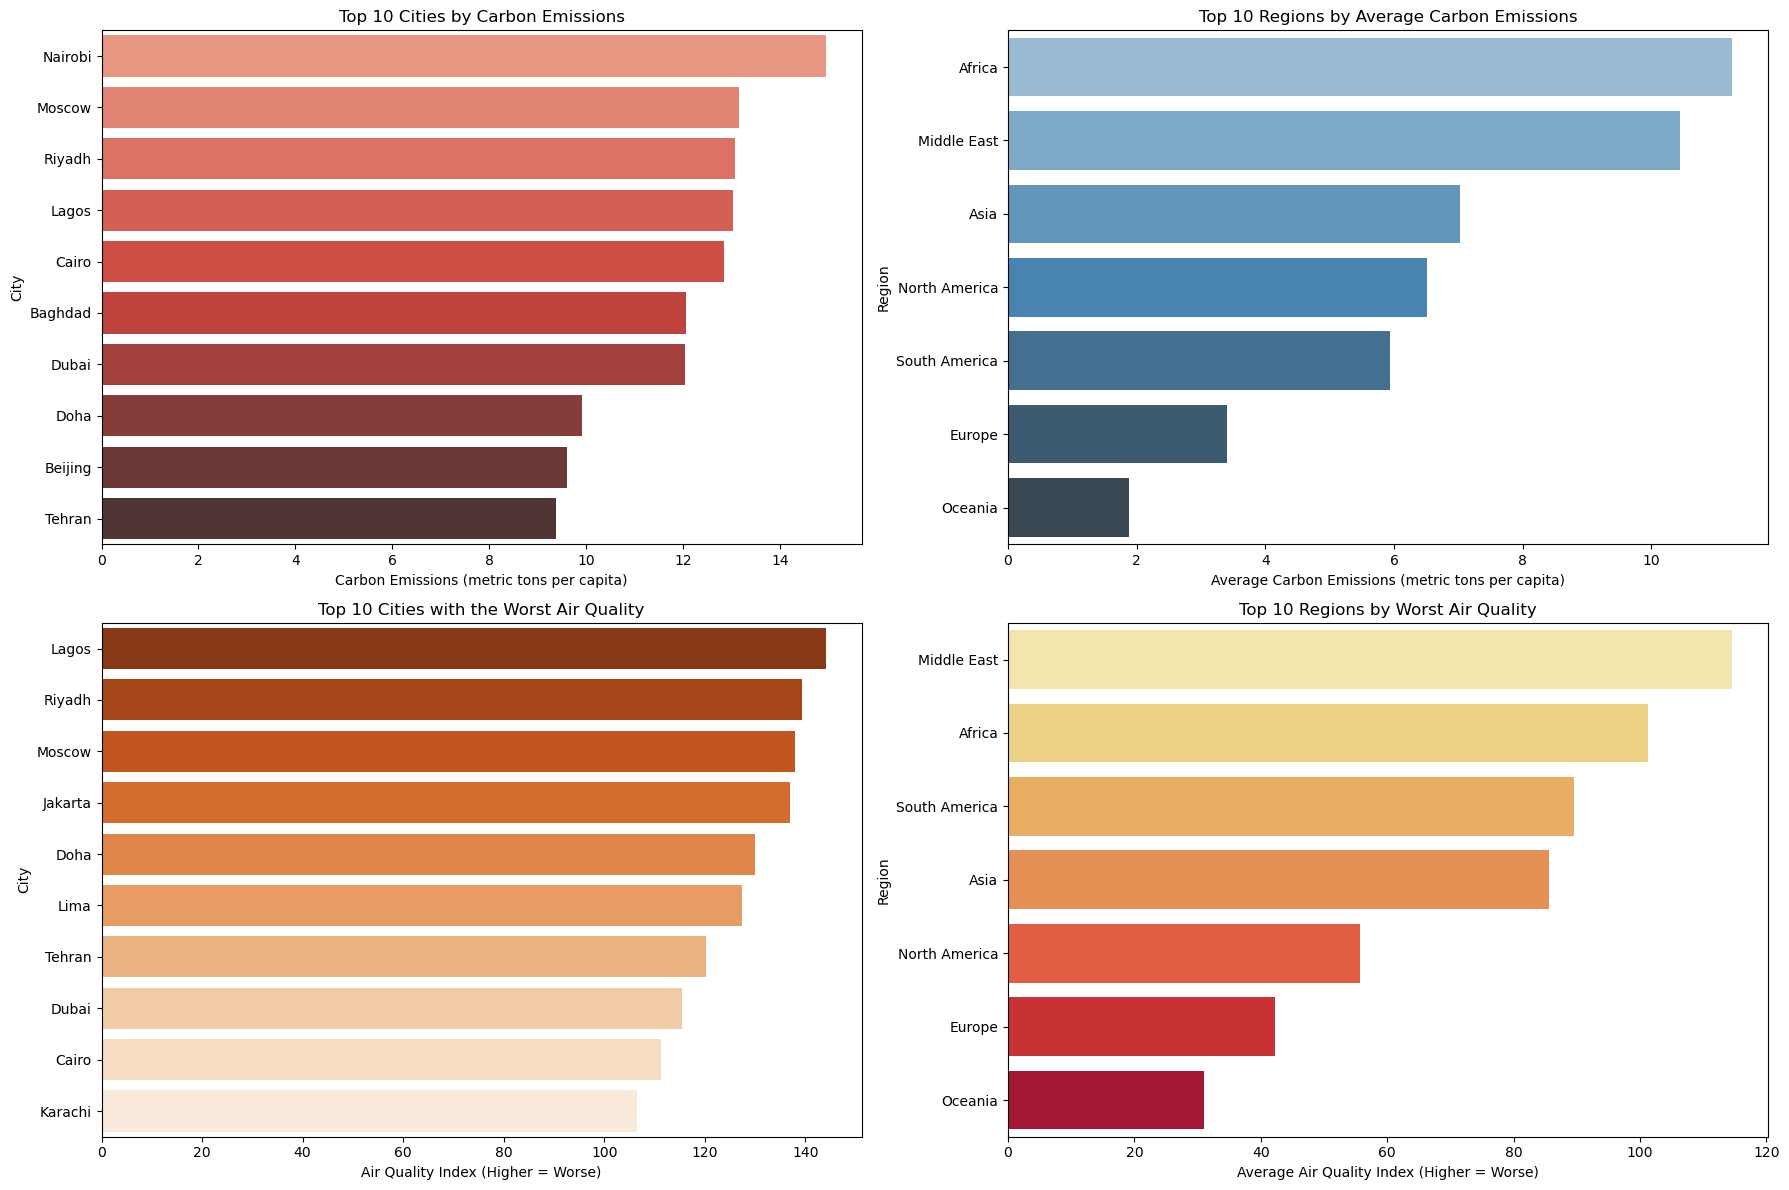

In [11]:
# Top 10 cities by carbon emissions
top10_emissions = df.sort_values(by="carbon_emissions", ascending=False).head(10)

# Top 10 regions by average carbon emissions
region_emissions = df.groupby("region")["carbon_emissions"].mean().sort_values(ascending=False).head(10).reset_index()

# Top 10 cities by worst air quality (higher AQI is worse)
top10_air_quality = df.sort_values(by="air_quality_index", ascending=False).head(10)

# Top 10 regions by average air quality index
region_aqi = df.groupby("region")["air_quality_index"].mean().sort_values(ascending=False).head(10).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # 2 rows, 2 columns

sns.barplot(ax=axes[0, 0], data=top10_emissions, y="city", x="carbon_emissions", palette="Reds_d")
axes[0, 0].set_title("Top 10 Cities by Carbon Emissions")
axes[0, 0].set_xlabel("Carbon Emissions (metric tons per capita)")
axes[0, 0].set_ylabel("City")

sns.barplot(ax=axes[0, 1], data=region_emissions, y="region", x="carbon_emissions", palette="Blues_d")
axes[0, 1].set_title("Top 10 Regions by Average Carbon Emissions")
axes[0, 1].set_xlabel("Average Carbon Emissions (metric tons per capita)")
axes[0, 1].set_ylabel("Region")

sns.barplot(ax=axes[1, 0], data=top10_air_quality, x="air_quality_index", y="city", palette="Oranges_r")
axes[1, 0].set_title("Top 10 Cities with the Worst Air Quality")
axes[1, 0].set_xlabel("Air Quality Index (Higher = Worse)")
axes[1, 0].set_ylabel("City")

sns.barplot(ax=axes[1, 1], data=region_aqi, x="air_quality_index", y="region", palette="YlOrRd")
axes[1, 1].set_title("Top 10 Regions by Worst Air Quality")
axes[1, 1].set_xlabel("Average Air Quality Index (Higher = Worse)")
axes[1, 1].set_ylabel("Region")

plt.tight_layout()
plt.show()



#### These visuals show a particular high number of airborne particulates and greenhouse gas intensity for African and Middle East Cities

In [12]:
# Top 10 cities with lowest green space
low_green = df.sort_values(by="green_space_pct", ascending=True).head(10)
# Top 10 cities with lowest renewable energy use
low_renewables = df.sort_values(by="renewable_energy_pct", ascending=True).head(10)
# Top 10 cities with lowest recycling rate
low_recycling = df.sort_values(by="waste_recycled_pct", ascending=True).head(10)

     

In [13]:
# Group by region and calculate average sustainability metrics
region_sustainability = df.groupby("region")[
    ["green_space_pct", "renewable_energy_pct", "waste_recycled_pct"]
].mean().sort_values(by="green_space_pct").reset_index()


In [14]:
# Define threshold values first
green_space_threshold = 15  # Example value, adjust based on your requirements
renewable_energy_threshold = 30  # Example value, adjust based on your requirements
waste_recycled_threshold = 25  # Example value, adjust based on your requirements

# Create boolean flags for low-performance
df["low_green_space"] = df["green_space_pct"] < green_space_threshold
df["low_renewable_energy"] = df["renewable_energy_pct"] < renewable_energy_threshold
df["low_waste_recycled"] = df["waste_recycled_pct"] < waste_recycled_threshold

# Composite Score: number of low-performance flags per city
df["low_sustainability_score"] = (
    df["low_green_space"].astype(int) +
    df["low_renewable_energy"].astype(int) +
    df["low_waste_recycled"].astype(int)
)

# Get cities with highest low-sustainability score (3 means poor in all 3 metrics)
worst_composite = df.sort_values(by="low_sustainability_score", ascending=False).head(10)


C:\Users\Oladayo\AppData\Local\Temp\ipykernel_15972\2360022409.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], data=low_green, x="green_space_pct", y="city", palette="Greens_r")
C:\Users\Oladayo\AppData\Local\Temp\ipykernel_15972\2360022409.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], data=low_renewables, x="renewable_energy_pct", y="city", palette="Purples_r")
C:\Users\Oladayo\AppData\Local\Temp\ipykernel_15972\2360022409.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 0], data=low_r

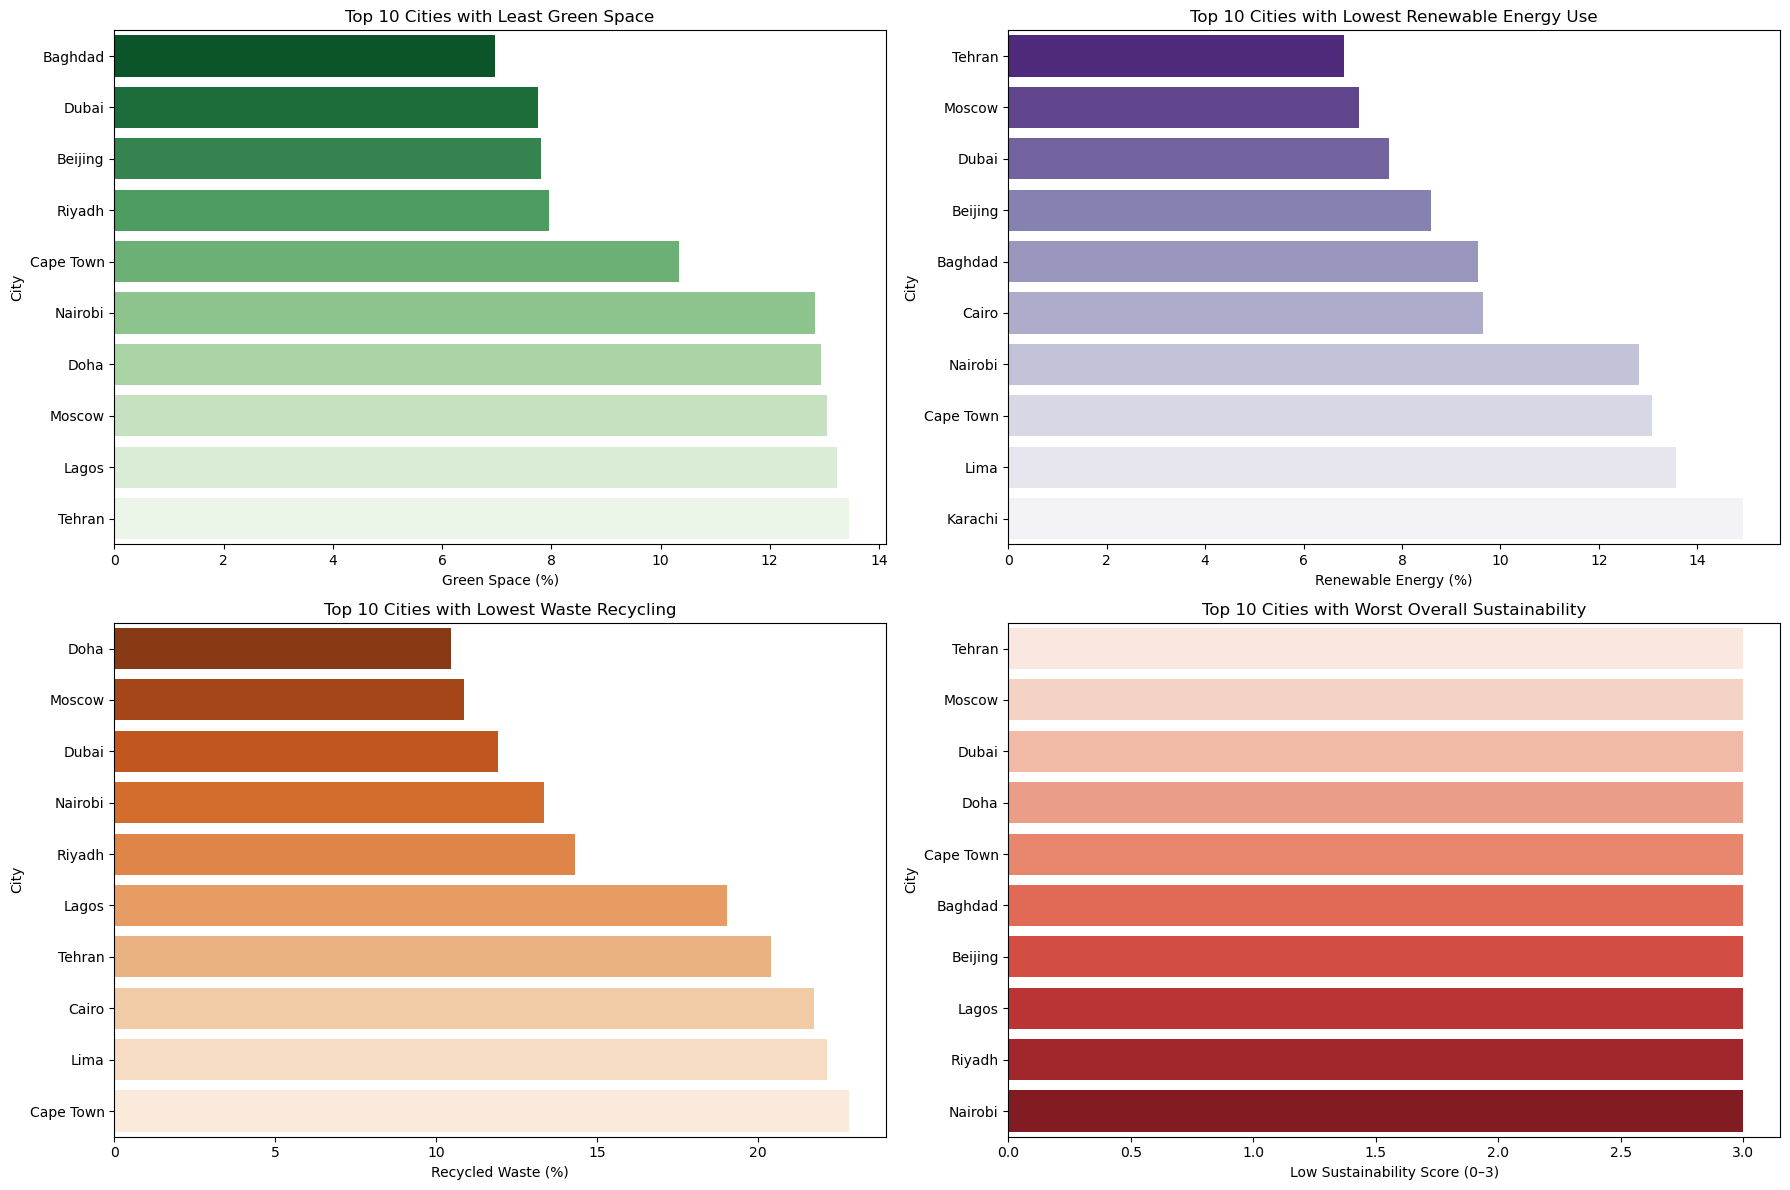

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Cities with Least Green Space 
sns.barplot(ax=axes[0, 0], data=low_green, x="green_space_pct", y="city", palette="Greens_r")
axes[0, 0].set_title("Top 10 Cities with Least Green Space")
axes[0, 0].set_xlabel("Green Space (%)")
axes[0, 0].set_ylabel("City")

# Cities with Least Renewable Energy Use
sns.barplot(ax=axes[0, 1], data=low_renewables, x="renewable_energy_pct", y="city", palette="Purples_r")
axes[0, 1].set_title("Top 10 Cities with Lowest Renewable Energy Use")
axes[0, 1].set_xlabel("Renewable Energy (%)")
axes[0, 1].set_ylabel("City")

# Cities with Least Waste Recycled 
sns.barplot(ax=axes[1, 0], data=low_recycling, x="waste_recycled_pct", y="city", palette="Oranges_r")
axes[1, 0].set_title("Top 10 Cities with Lowest Waste Recycling")
axes[1, 0].set_xlabel("Recycled Waste (%)")
axes[1, 0].set_ylabel("City")

# Composite Low-Sustainability Score
sns.barplot(ax=axes[1, 1], data=worst_composite, x="low_sustainability_score", y="city", palette="Reds")
axes[1, 1].set_title("Top 10 Cities with Worst Overall Sustainability")
axes[1, 1].set_xlabel("Low Sustainability Score (0–3)")
axes[1, 1].set_ylabel("City")

plt.tight_layout()
plt.show()


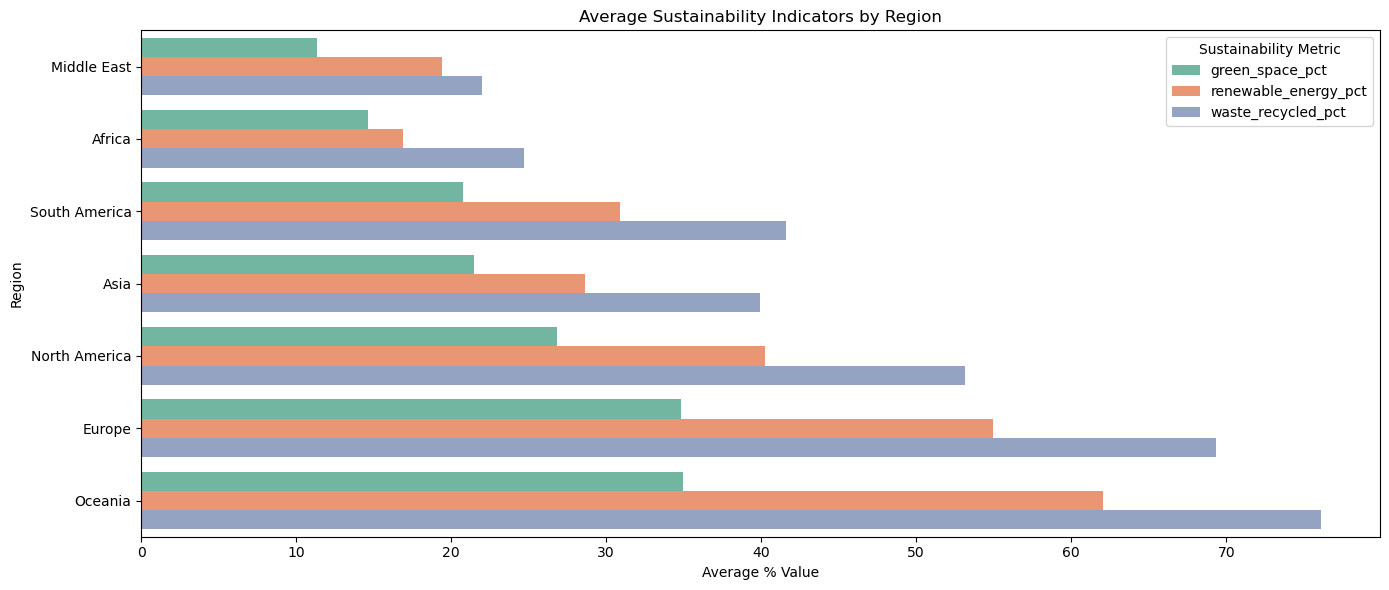

In [16]:
# Plot regional sustainability patterns
region_sustainability_melted = region_sustainability.melt(id_vars="region", 
                      value_vars=["green_space_pct", "renewable_energy_pct", "waste_recycled_pct"],
                      var_name="Indicator", value_name="Percentage")

plt.figure(figsize=(14, 6))
sns.barplot(data=region_sustainability_melted, x="Percentage", y="region", hue="Indicator", palette="Set2")
plt.title("Average Sustainability Indicators by Region")
plt.xlabel("Average % Value")
plt.ylabel("Region")
plt.legend(title="Sustainability Metric")
plt.tight_layout()
plt.show()



C:\Users\Oladayo\AppData\Local\Temp\ipykernel_15972\1951249777.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="region", y="carbon_emissions", ax=axes[0, 0], palette="Reds", order=order_emissions)
C:\Users\Oladayo\AppData\Local\Temp\ipykernel_15972\1951249777.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="region", y="green_space_pct", ax=axes[0, 1], palette="Greens", order=order_green)
C:\Users\Oladayo\AppData\Local\Temp\ipykernel_15972\1951249777.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,

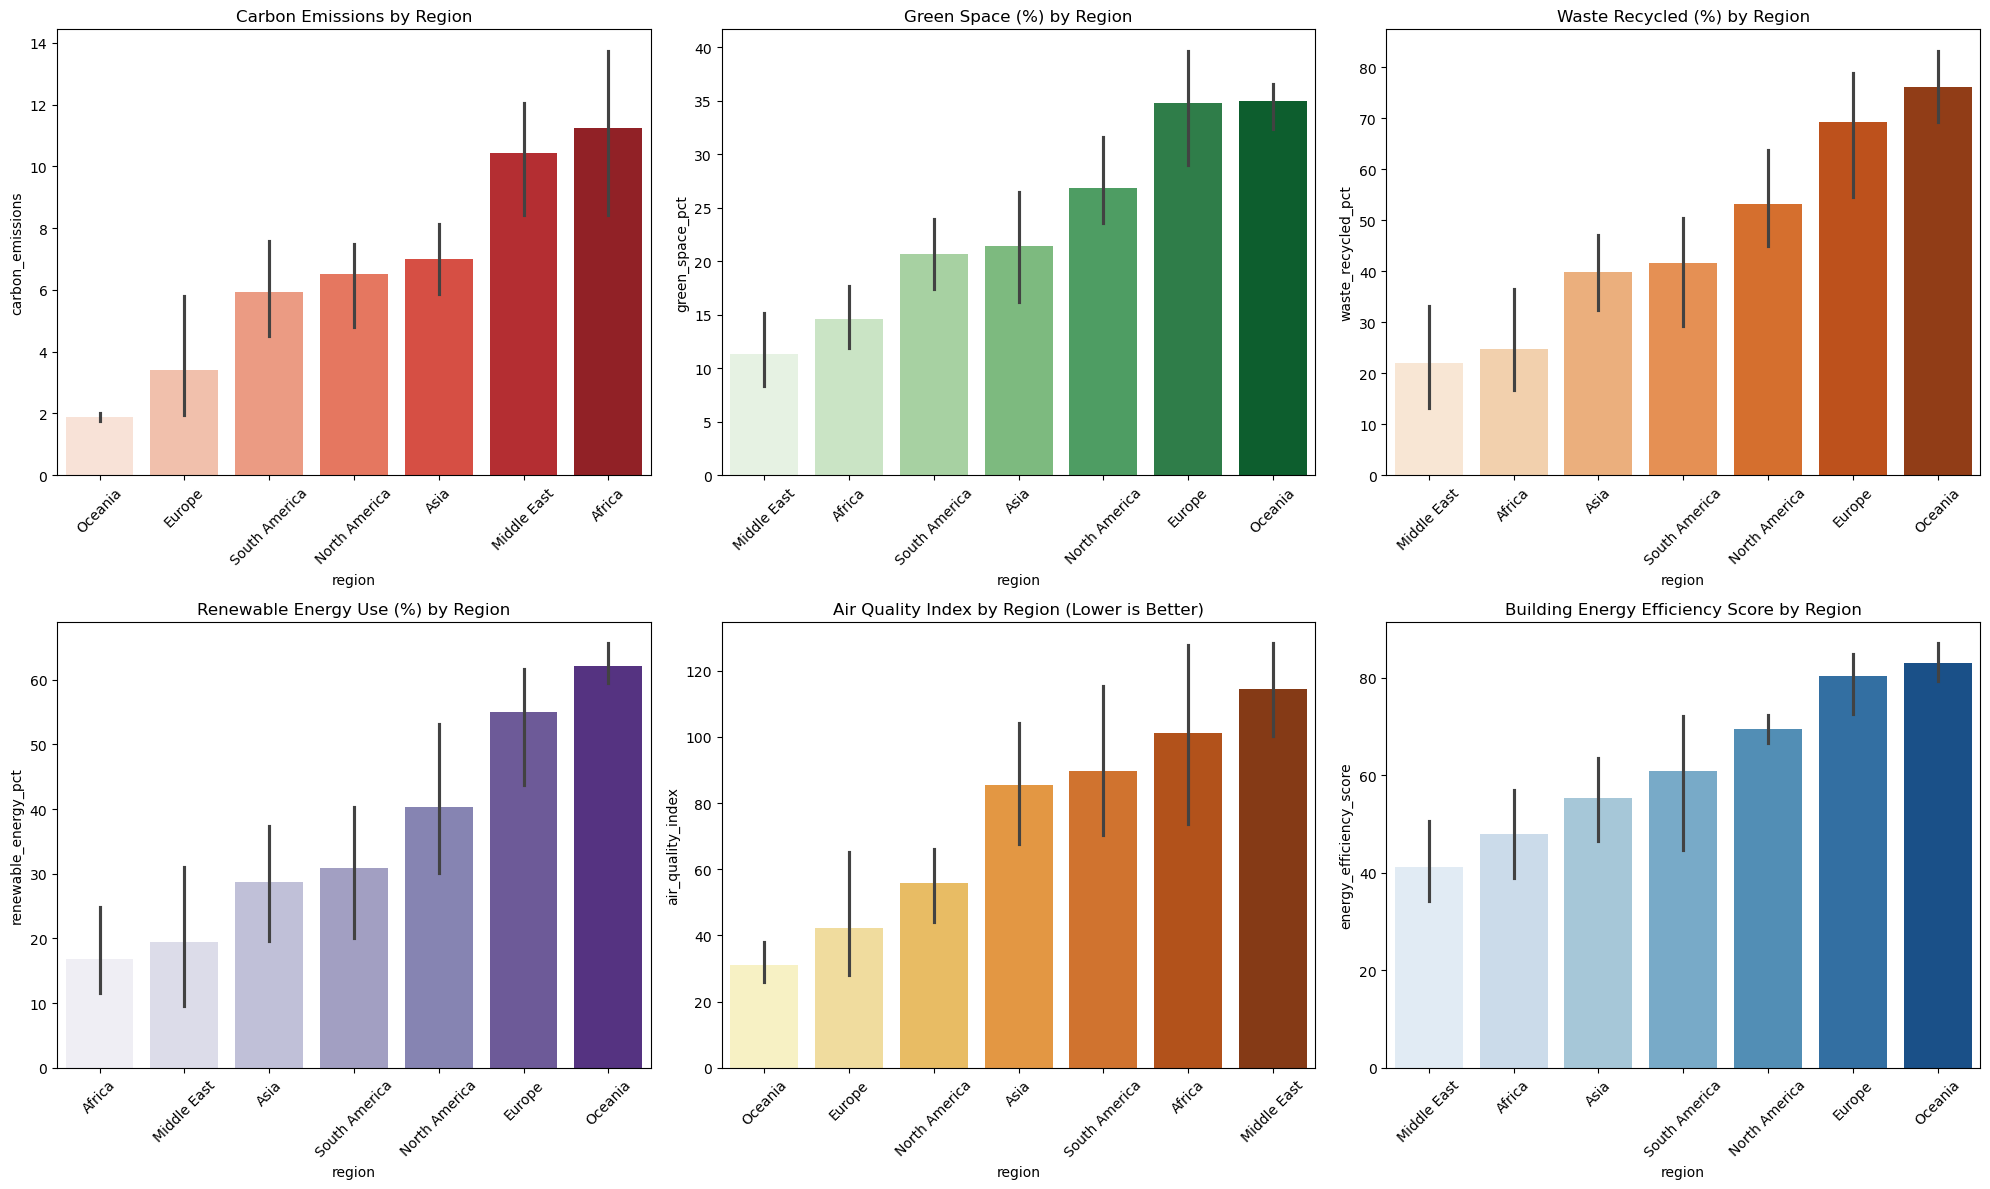

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

order_emissions = df.groupby("region")["carbon_emissions"].mean().sort_values().index
order_green = df.groupby("region")["green_space_pct"].mean().sort_values().index
order_recycled = df.groupby("region")["waste_recycled_pct"].mean().sort_values().index
order_renewables = df.groupby("region")["renewable_energy_pct"].mean().sort_values().index
order_air = df.groupby("region")["air_quality_index"].mean().sort_values().index
order_efficiency = df.groupby("region")["energy_efficiency_score"].mean().sort_values().index

# --- Carbon Emissions ---
sns.barplot(data=df, x="region", y="carbon_emissions", ax=axes[0, 0], palette="Reds", order=order_emissions)
axes[0, 0].set_title("Carbon Emissions by Region")
axes[0, 0].tick_params(axis='x', rotation=45)

# --- Green Space ---
sns.barplot(data=df, x="region", y="green_space_pct", ax=axes[0, 1], palette="Greens", order=order_green)
axes[0, 1].set_title("Green Space (%) by Region")
axes[0, 1].tick_params(axis='x', rotation=45)

# --- Waste Recycled ---
sns.barplot(data=df, x="region", y="waste_recycled_pct", ax=axes[0, 2], palette="Oranges", order=order_recycled)
axes[0, 2].set_title("Waste Recycled (%) by Region")
axes[0, 2].tick_params(axis='x', rotation=45)

# --- Renewable Energy Use ---
sns.barplot(data=df, x="region", y="renewable_energy_pct", ax=axes[1, 0], palette="Purples", order=order_renewables)
axes[1, 0].set_title("Renewable Energy Use (%) by Region")
axes[1, 0].tick_params(axis='x', rotation=45)

# --- Air Quality Index ---
sns.barplot(data=df, x="region", y="air_quality_index", ax=axes[1, 1], palette="YlOrBr", order=order_air)
axes[1, 1].set_title("Air Quality Index by Region (Lower is Better)")
axes[1, 1].tick_params(axis='x', rotation=45)

# --- Energy Efficiency Score ---
sns.barplot(data=df, x="region", y="energy_efficiency_score", ax=axes[1, 2], palette="Blues", order=order_efficiency)
axes[1, 2].set_title("Building Energy Efficiency Score by Region")
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


C:\Users\Oladayo\AppData\Local\Temp\ipykernel_15972\3807407285.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="region", y="renewable_energy_pct", palette="Purples", order=ordered_regions)


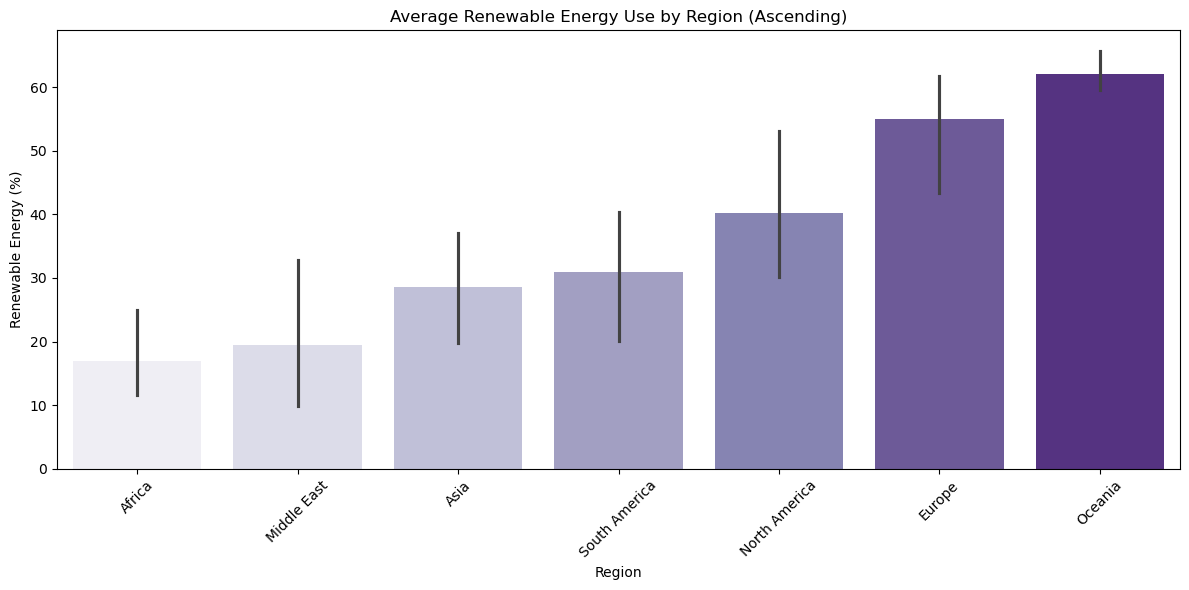

In [18]:
# Calculate average renewable energy percentage by region
region_renewables = df.groupby("region")["renewable_energy_pct"].mean().sort_values(ascending=True)

# Preserve the region order based on sorted averages
ordered_regions = region_renewables.index.tolist()

# Plot with sorted order
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="region", y="renewable_energy_pct", palette="Purples", order=ordered_regions)
plt.title("Average Renewable Energy Use by Region (Ascending)")
plt.xlabel("Region")
plt.ylabel("Renewable Energy (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



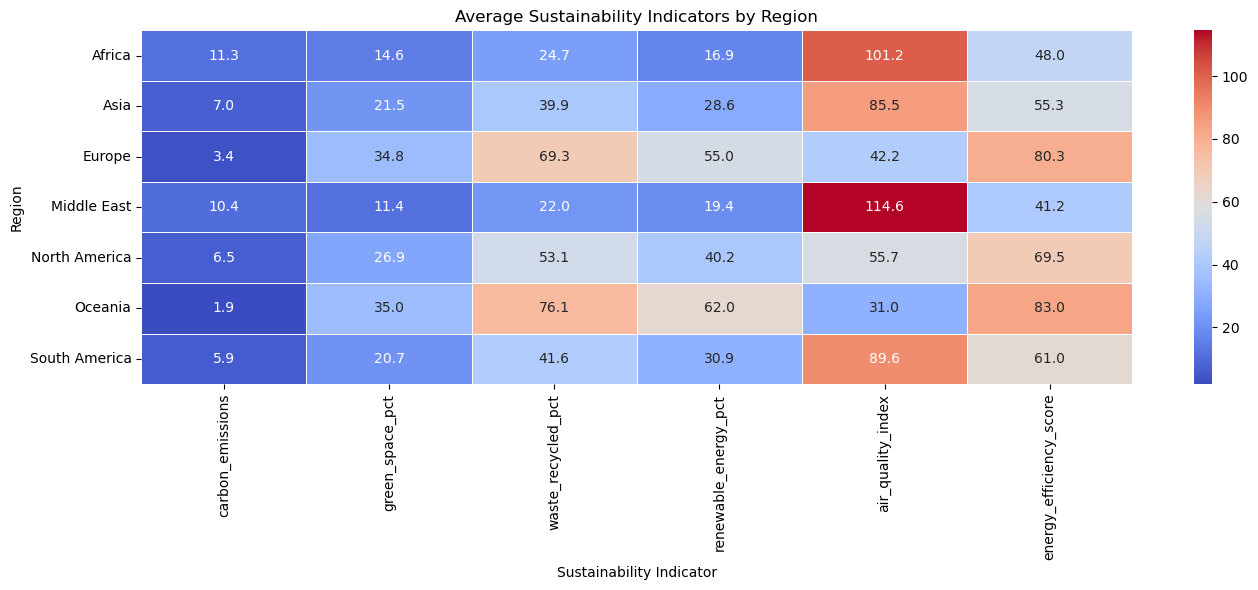

In [19]:
# Group by region and compute average sustainability indicators
region_summary = df.groupby("region")[[
    "carbon_emissions",
    "green_space_pct",
    "waste_recycled_pct",
    "renewable_energy_pct",
    "air_quality_index",
    "energy_efficiency_score"
]].mean().round(1)

# Create heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(region_summary, annot=True, cmap="coolwarm", fmt=".1f", linewidths=.5)
plt.title("Average Sustainability Indicators by Region")
plt.xlabel("Sustainability Indicator")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


In [20]:
df_clustering = df.drop(columns=["city", "country", "iso_alpha", "region"])

In [21]:
df_clustering.head()

green_space_pct  air_quality_index  waste_recycled_pct  \
0        34.130312          27.803701           73.260731   
1        30.691328          29.976149           69.926681   
2        34.371654          41.449656           73.463327   
3        30.973934          20.225760           80.081712   
4        34.050208          34.710316           64.372697   

   renewable_energy_pct  carbon_emissions  energy_efficiency_score  \
0             57.587172          1.585469                83.770061   
1             62.110763          3.966732                85.323118   
2             57.134641          1.807427                80.960685   
3             60.670239          2.077827                82.198456   
4             65.635807          1.629242                85.289516   

   avg_commute_time  water_access_pct  population  low_green_space  \
0         35.434601         98.654147    12820569            False   
1         31.853070         95.780819     8376519            False   
2         35.644900         96.172806     2276647            False   
3         27.514830         99.816734    13431216            False   
4         27.654293         96.276533    17040922            False   

   low_renewable_energy  low_waste_recycled  low_sustainability_score  
0                 False               False                         0  
1                 False               False                         0  
2                 False               False                         0  
3                 False               False                         0  
4                 False               False                         0

In [22]:
len(df_clustering.columns)

13

ValueError: num must be an integer with 1 <= num <= 9, not 10

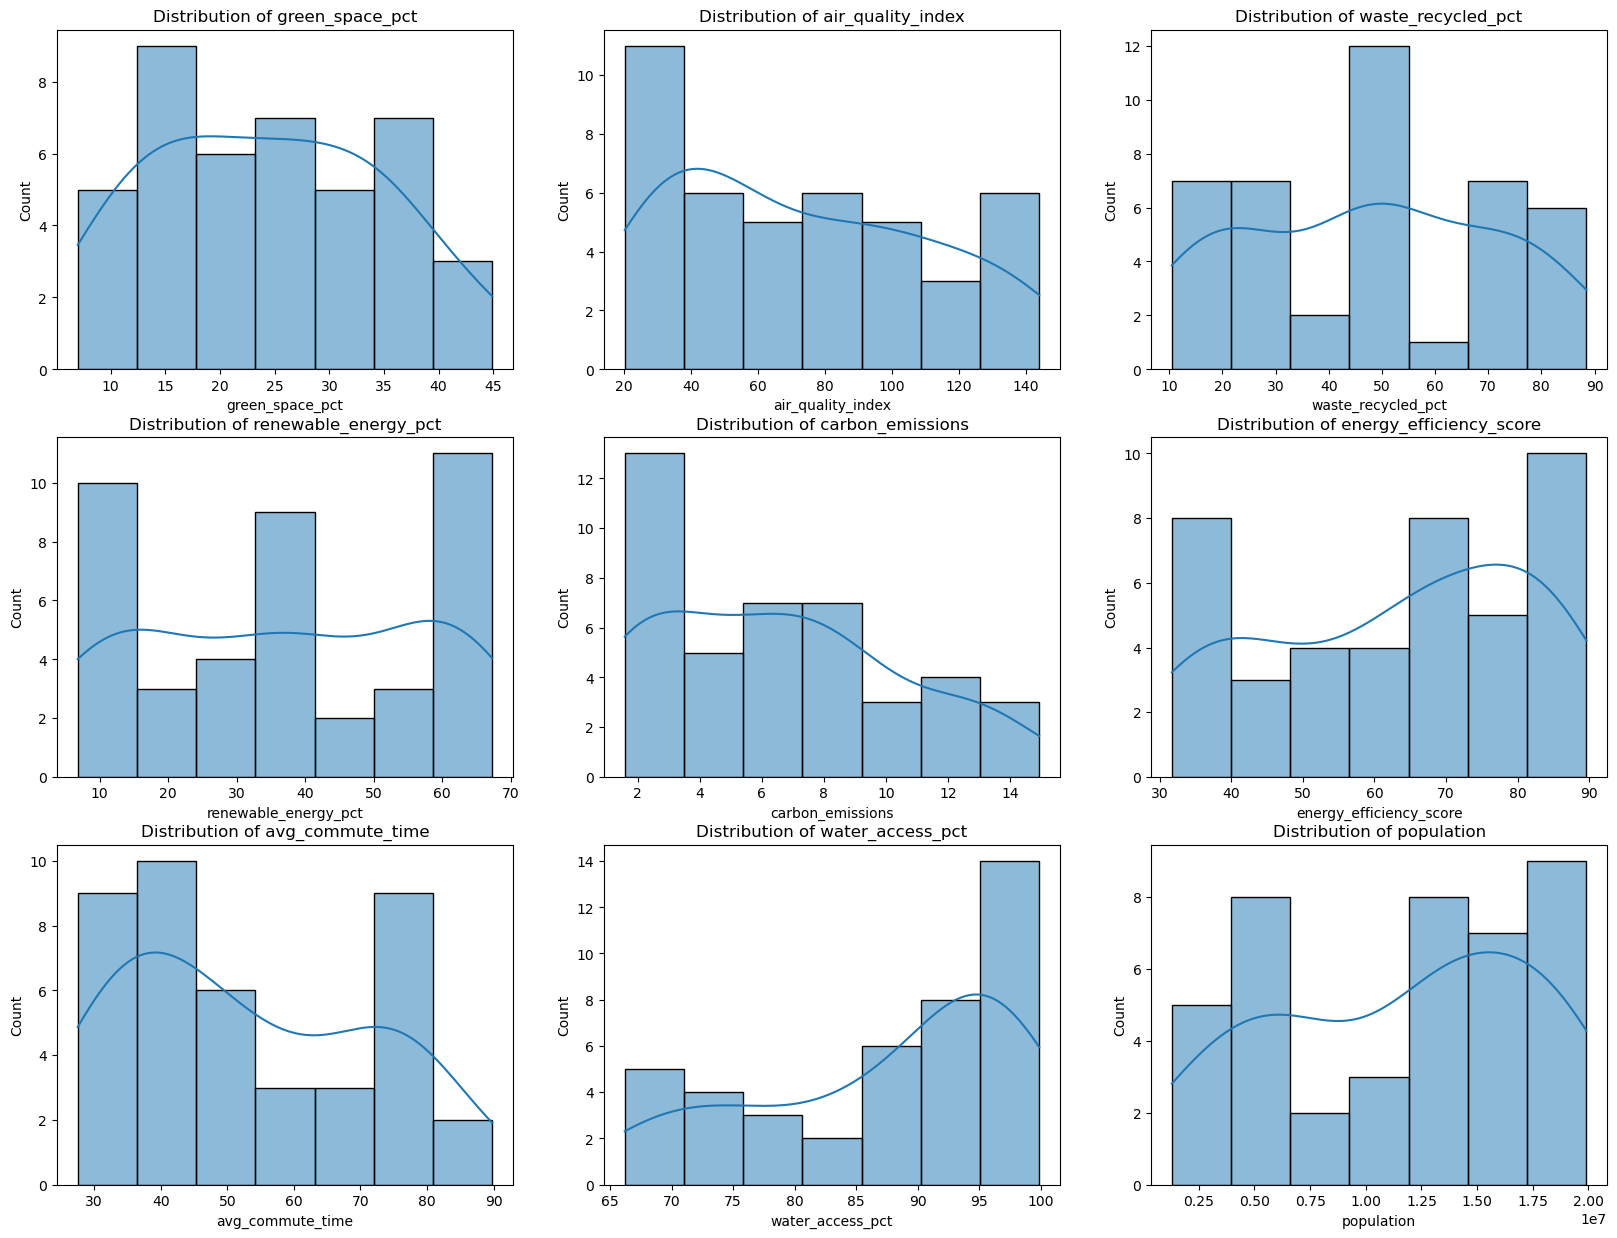

In [23]:
plt.figure(figsize=(20, 15))

for i, column_name in enumerate(df_clustering, 1):
    plt.subplot(3, 3, i)
    # plt.subplots(nrows=3, ncols=3, index=i)
    sns.histplot(df_clustering[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")

plt.tight_layout()
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_clustering)


In [25]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)


C:\Users\Oladayo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Oladayo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Oladayo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Oladayo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

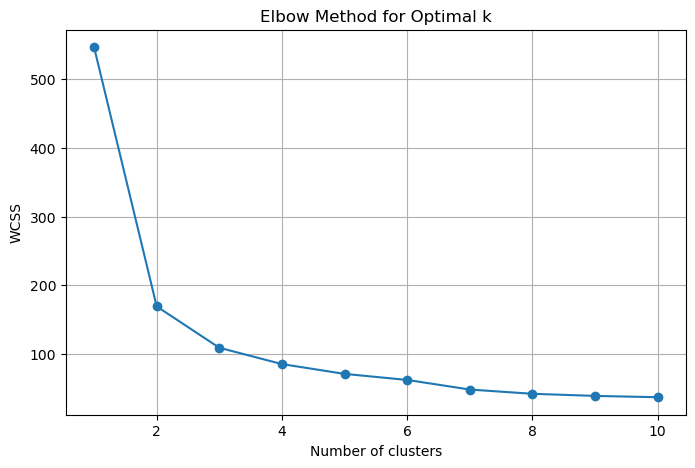

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [28]:
df['cluster'] = kmeans.fit_predict(scaled_df)

C:\Users\Oladayo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


- High emissions and low recycling → likely needs intervention.
- Strong green infrastructure → sustainability leaders.

<Axes: xlabel='cluster', ylabel='green_space_pct'>

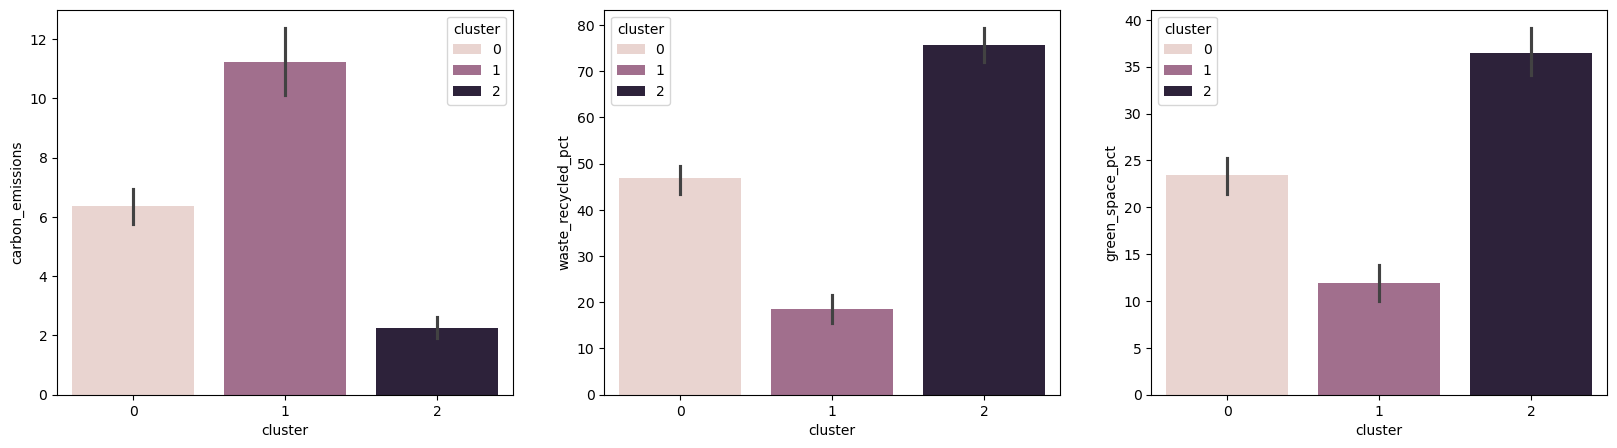

In [29]:
fig, ax = plt.subplots(1,3, figsize=(20, 5))
sns.barplot(x='cluster', y='carbon_emissions', hue='cluster', data=df, ax=ax[0])
sns.barplot(x='cluster', y='waste_recycled_pct', hue='cluster', data=df, ax=ax[1])
sns.barplot(x='cluster', y='green_space_pct', hue='cluster', data=df, ax=ax[2])
# sns.barplot(x='cluster', y='waste_recycled_pct', data=df, ax=ax[1])

### 🧠 Interpretation

- **Cluster 0**: Moderate performance, mixed attributes
- **Cluster 1**: Critical cities with high emissions, low green energy, and poor recycling rates
- **Cluster 2**: High-performing cities with strong green metrics and low emissions

These insights will guide GreenCityWatch in targeting aid and green policy interventions.


In [30]:
# Map numeric clusters to meaningful sustainability labels
df["cluster_label"] = df["cluster"].map({
                                        0: "Transitional Cities",
                                        1: "Critical Intervention Zone",
                                        2: "Sustainability Leaders"
                                    })

In [31]:
df.head()

city  green_space_pct  air_quality_index  waste_recycled_pct  \
0  Berlin        34.130312          27.803701           73.260731   
1  London        30.691328          29.976149           69.926681   
2   Paris        34.371654          41.449656           73.463327   
3  Madrid        30.973934          20.225760           80.081712   
4    Rome        34.050208          34.710316           64.372697   

   renewable_energy_pct  carbon_emissions  energy_efficiency_score  \
0             57.587172          1.585469                83.770061   
1             62.110763          3.966732                85.323118   
2             57.134641          1.807427                80.960685   
3             60.670239          2.077827                82.198456   
4             65.635807          1.629242                85.289516   

   avg_commute_time  water_access_pct  population         country iso_alpha  \
0         35.434601         98.654147    12820569         Germany       DEU   
1         31.853070         95.780819     8376519  United Kingdom       GBR   
2         35.644900         96.172806     2276647          France       FRA   
3         27.514830         99.816734    13431216           Spain       ESP   
4         27.654293         96.276533    17040922           Italy       ITA   

   region  low_green_space  low_renewable_energy  low_waste_recycled  \
0  Europe            False                 False               False   
1  Europe            False                 False               False   
2  Europe            False                 False               False   
3  Europe            False                 False               False   
4  Europe            False                 False               False   

   low_sustainability_score  cluster           cluster_label  
0                         0        2  Sustainability Leaders  
1                         0        2  Sustainability Leaders  
2                         0        2  Sustainability Leaders  
3                         0        2  Sustainability Leaders  
4                         0        2  Sustainability Leaders

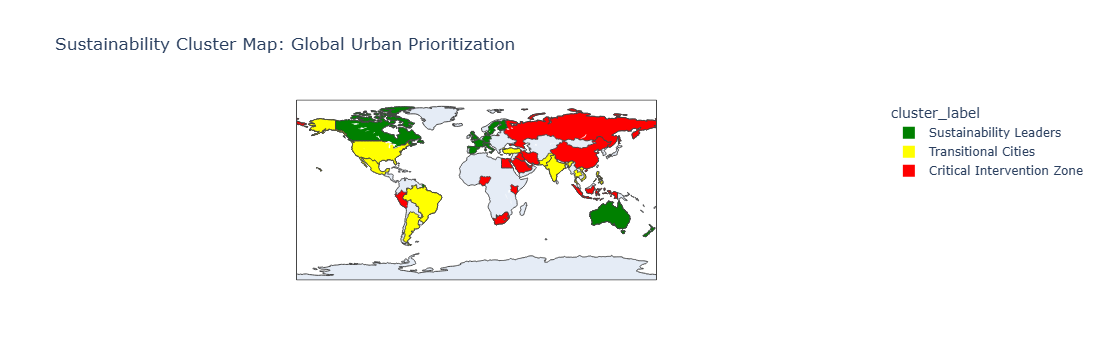

In [32]:
import plotly.express as px

fig = px.choropleth(
    df,
    locationmode = 'country names',
    locations="country",
    color="cluster_label",
    hover_name="country",
    title="Sustainability Cluster Map: Global Urban Prioritization",
    color_discrete_map={
                        "Critical Intervention Zone":"red",
                        "Transitional Cities":"yellow",
                        "Sustainability Leaders":"green"
                                    }
)
fig.show()


## Extra visualizations

#### carbon_emissions vs. renewable_energy_pct
→ Show the trade-off between pollution and green energy use.


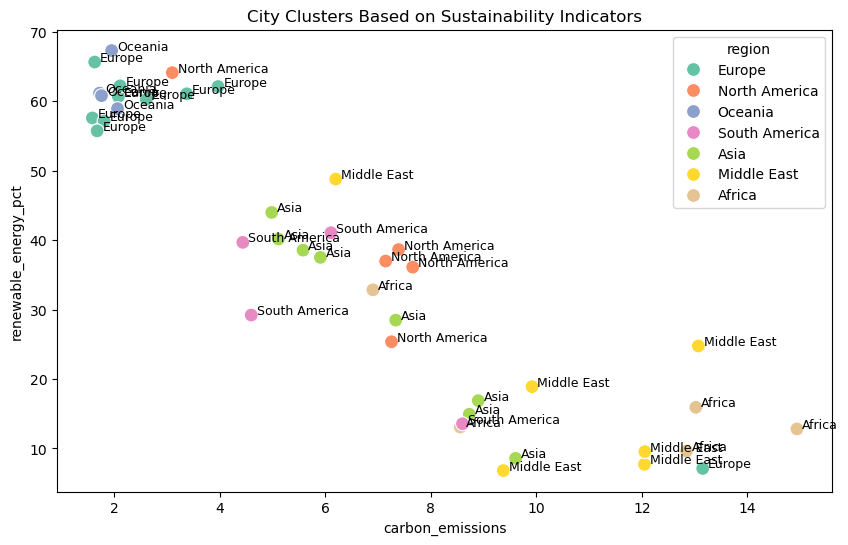

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carbon_emissions', y='renewable_energy_pct', hue='region', palette='Set2', s=100)
for i in range(df.shape[0]):
    plt.text(df.carbon_emissions[i]+0.1, df.renewable_energy_pct[i]+0.1, df.region[i], fontsize=9)
plt.title("City Clusters Based on Sustainability Indicators")
plt.grid(False)
plt.show()


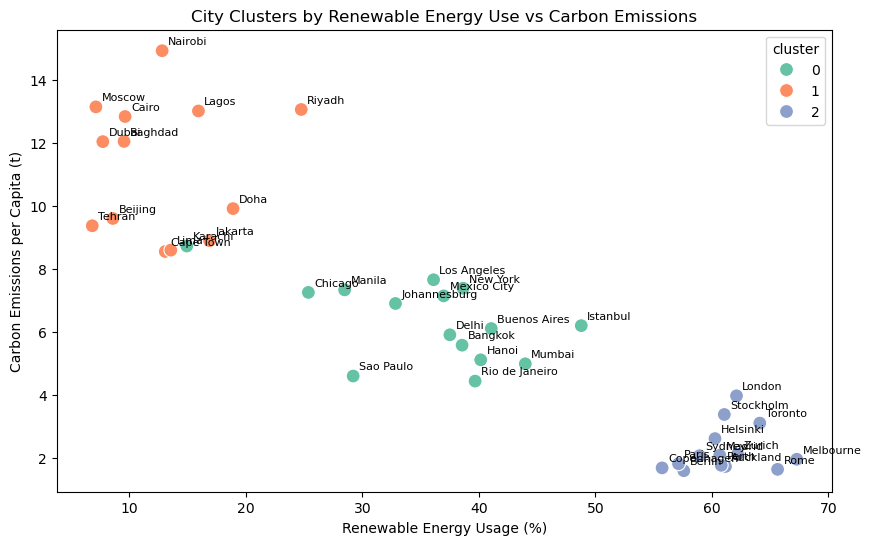

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='renewable_energy_pct', 
    y='carbon_emissions', 
    hue='cluster', 
    palette='Set2', 
    s=100
)

# Annotate city names
for i in range(df.shape[0]):
    plt.text(df['renewable_energy_pct'][i] + 0.5, df['carbon_emissions'][i] + 0.2, df['city'][i], fontsize=8)

plt.title("City Clusters by Renewable Energy Use vs Carbon Emissions")
plt.xlabel("Renewable Energy Usage (%)")
plt.ylabel("Carbon Emissions per Capita (t)")
plt.grid(False)
plt.show()


## Inference

In [35]:
import joblib

In [36]:
joblib.dump(kmeans, 'kmeans_sustainability_model.joblib')
joblib.dump(scaler, 'scaler_sustainability_model.joblib')

['scaler_sustainability_model.joblib']